In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score




In [94]:
"""
Bringing it together:

- Try to find out why customers churn
- Can we predict which customers will churn?
- Hint: The below can be useful
     Coefficients from logistic models
     Feature importance from tree based models

"""

'\nBringing it together:\n\n- Try to find out why customers churn\n- Can we predict which customers will churn?\n- Hint: The below can be useful\n     Coefficients from logistic models\n     Feature importance from tree based models\n\n'

In [95]:
cust_df = pd.read_csv("./data/anon_cust_data.csv")

In [96]:
cust_df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
cust_df.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
cust_df = cust_df.drop("Unnamed: 0", axis=1)

cust_df["TotalCharges"] = pd.to_numeric(cust_df["TotalCharges"], errors="coerce")

cust_df["Churn"] = cust_df["Churn"].map({"Yes": 1, "No": 0})



In [100]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [101]:
X = cust_df.drop("Churn", axis=1)
y =  cust_df["Churn"]

In [102]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [103]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [104]:
# Separating categorical and numerical columns 

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [105]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [106]:
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [107]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
# Pipeline for cleaning and preparing numeric columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [109]:
# Pipeline for cleaning and converting categorical string/text columns

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [110]:
# Preparing categorical and numerical data before modeling

preprocess = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

In [111]:
# Preparing a logistic regression model pipeline 

log_model = Pipeline([
    ("prep", preprocess),
    ("logreg", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [127]:
y_pred = log_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)

"Accuracy:", lr_accuracy

('Accuracy:', 0.8055358410220014)

In [112]:
# X["gender"] = X["gender"].map({"Female": 1, "Male": 0})
# X["Partner"] = X["Partner"].map({"Yes": 1, "No": 0})
# X["Dependents"] = X["Dependents"].map({"Yes": 1, "No": 0})
# X["PhoneService"] = X["PhoneService"].map({"Yes": 1, "No": 0})
# X["MultipleLines"] = X["MultipleLines"].map({"Yes": 1, "No": 0, "No phone service": 0})
# X["InternetService"] = X["InternetService"].map({"DSL": 1, "Fiber optic": 2, "No": 0})
# X["OnlineSecurity"] = X["OnlineSecurity"].map({"Yes": 1, "No": 0, "No internet service": 0})
# X["OnlineBackup"] = X["OnlineBackup"].map({"Yes": 1, "No": 0, "No internet service": 0})
# X["DeviceProtection"] = X["DeviceProtection"].map({"Yes": 1, "No": 0, "No internet service": 0})
# X["TechSupport"] = X["TechSupport"].map({"Yes": 1, "No": 0, "No internet service": 0})
# X["StreamingTV"] = X["StreamingTV"].map({"Yes": 1, "No": 0, "No internet service": 0})
# X["StreamingMovies"] = X["StreamingMovies"].map({"Yes": 1, "No": 0, "No internet service": 0})
# X["Contract"] = X["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
# X["PaperlessBilling"] = X["PaperlessBilling"].map({"Yes": 1, "No": 0})
# X["PaymentMethod"] = X["PaymentMethod"].map({"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3})

In [128]:
# To display most important features

feature_names = log_model.named_steps["prep"].get_feature_names_out()
coefs = log_model.named_steps["logreg"].coef_[0]

coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs}).sort_values("coef", ascending=False).sort_values("coef", ascending=False)

coef_df.head(14)

,feature,coef
10,cat__InternetService_Fiber optic,1.199218
3,num__TotalCharges,0.513253
21,cat__StreamingTV_Yes,0.383225
23,cat__StreamingMovies_Yes,0.382622
28,cat__PaymentMethod_Electronic check,0.381086
26,cat__PaperlessBilling_Yes,0.372843
9,cat__MultipleLines_Yes,0.364750
29,cat__PaymentMethod_Mailed check,0.072377
0,num__SeniorCitizen,0.054617
17,cat__DeviceProtection_Yes,0.037983


In [ ]:
"""
LogisticRegression Model Prediction:

- Positive coefficient increases likelihood of churn (customer is more likely to leave)
- Negative coefficient decreases likelihood of churn (customer is more likely to stay)

- Top factors that INCREASE churn (High Risk Customers):

InternetService = Fiber Optic with coeff 1.20. Fiber customers churn the most, likely due to high speed equals higher bills.
Higher TotalCharges with coeff 0.51. People who pay more overall are more likely to leave.
StreamingTV = Yes with coeff 0.38. Customers with many add-ons are likely churn more.
StreamingMovies = Yes with coeff 0.38. More add-ons equals higher cost and higher churn risk.
PaymentMethod = Electronic check with coeff 0.38. Electronic-check users consistently have higher churn according to the database used. Dont exactly know why...

PaperlessBilling = Yes with coeff 0.37. Customers opting for paperless often pay online with is also linked with electronic checks and equals higher churn group for some reason...?.

MultipleLines = Yes wit coeff 0.36. Multi-line customers churn more most likely due to higher bills and more complexity.

- Factors that Decrease Churn

PaymentMethod = Credit card automatic with coeff -0.03. Auto-paying credit card users churn less. 
OnlineBackup = Yes with coeff -0.09. Backup service users tend to stay.
OnlineBackup = No internet service with coeff -0.17. If they don’t have internet, they can't churn internet services.



"""

In [114]:
# Building and training RandomForest model inside pipeline

rf_model = Pipeline([
    ("prep", preprocess),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [126]:
y_predict = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_predict)

"Accuracy:", rf_accuracy


('Accuracy:', 0.7906316536550745)

In [132]:
# To display which features matter most using RandomForest Model

importances = rf_model.named_steps["rf"].feature_importances_

feat_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

feat_imp_df.head(14)

,feature,importance
3,num__TotalCharges,0.194385
1,num__tenure,0.169641
2,num__MonthlyCharges,0.167966
10,cat__InternetService_Fiber optic,0.039291
28,cat__PaymentMethod_Electronic check,0.038884
25,cat__Contract_Two year,0.031864
4,cat__gender_Male,0.028531
13,cat__OnlineSecurity_Yes,0.027021
26,cat__PaperlessBilling_Yes,0.026016
5,cat__Partner_Yes,0.023123


In [ ]:
"""
RandomForest Classifier Model

Top factors that INCREASE churn (High Risk Customers):

TotalCharges with coeff 0.19. 
Tenure with coeff 0.17. 
Monthly Charges with coeff 0.16.




"""

<Figure size 1200x800 with 0 Axes>

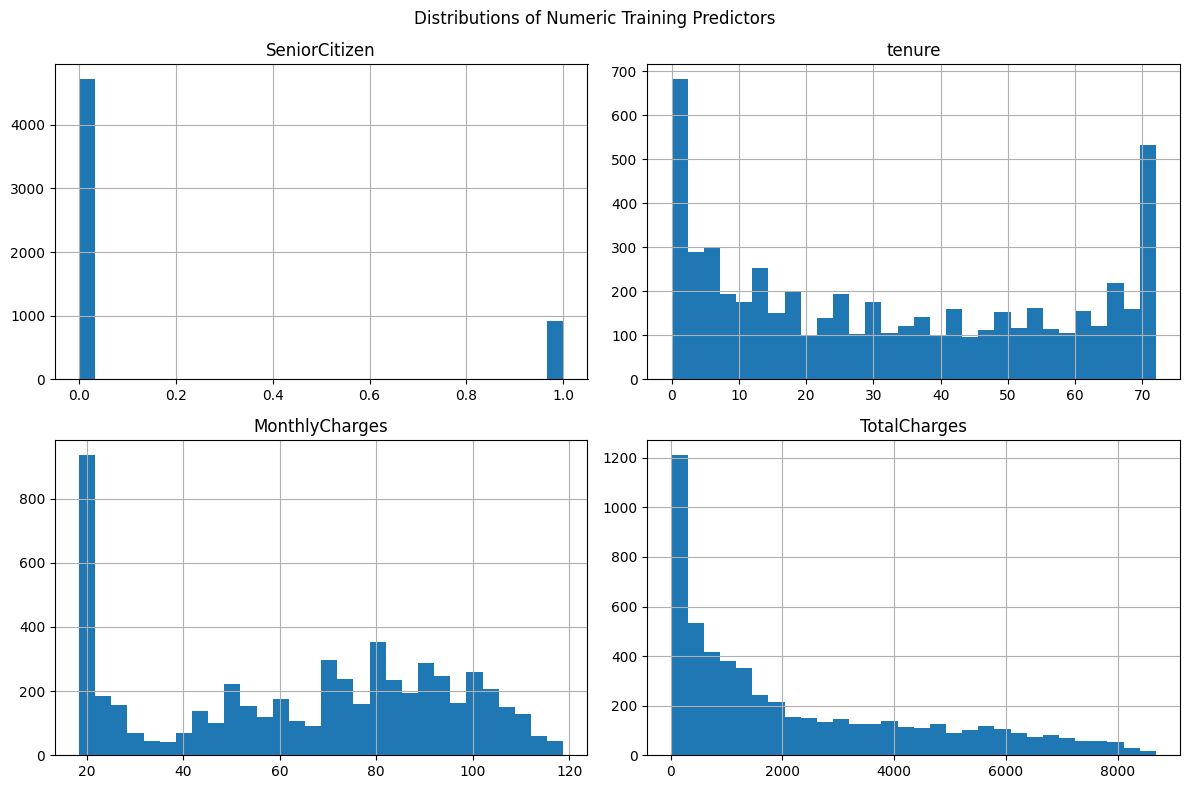

In [117]:
plt.figure(figsize=(12, 8))
X_train.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distributions of Numeric Training Predictors")
plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

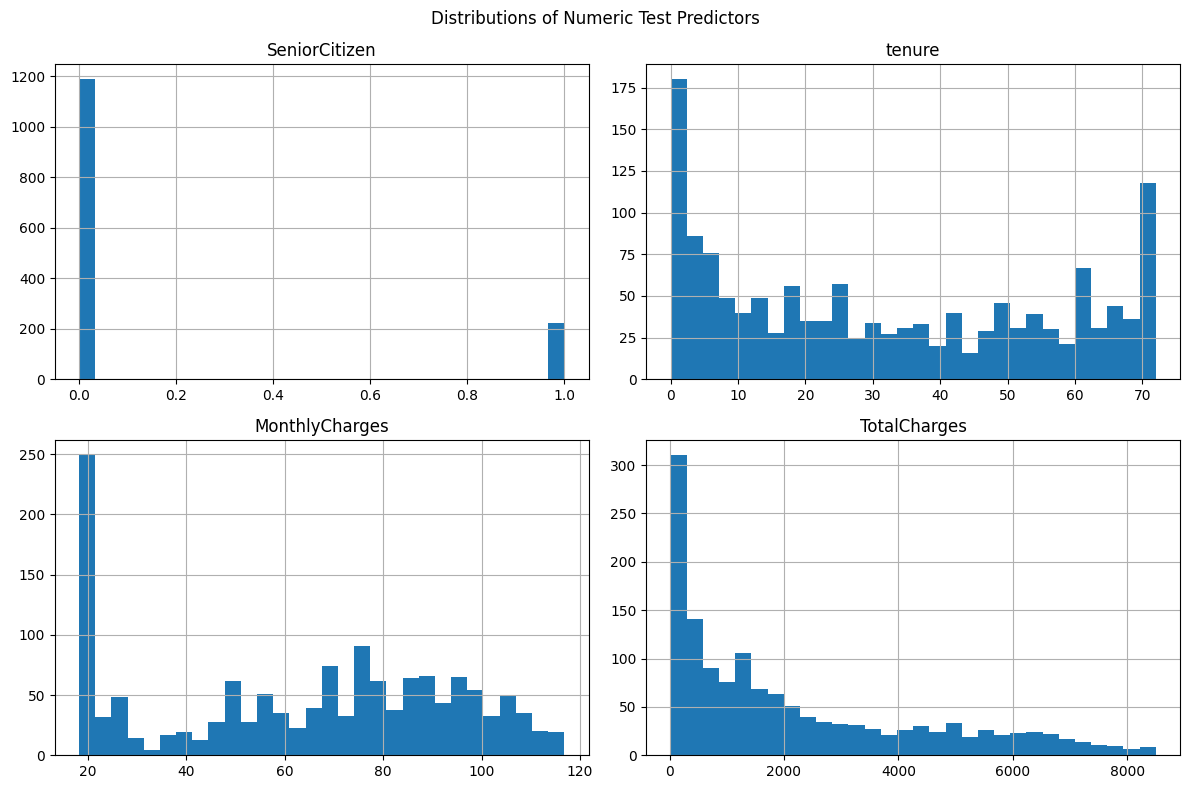

In [118]:
plt.figure(figsize=(12, 8))
X_test.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distributions of Numeric Test Predictors")
plt.tight_layout()


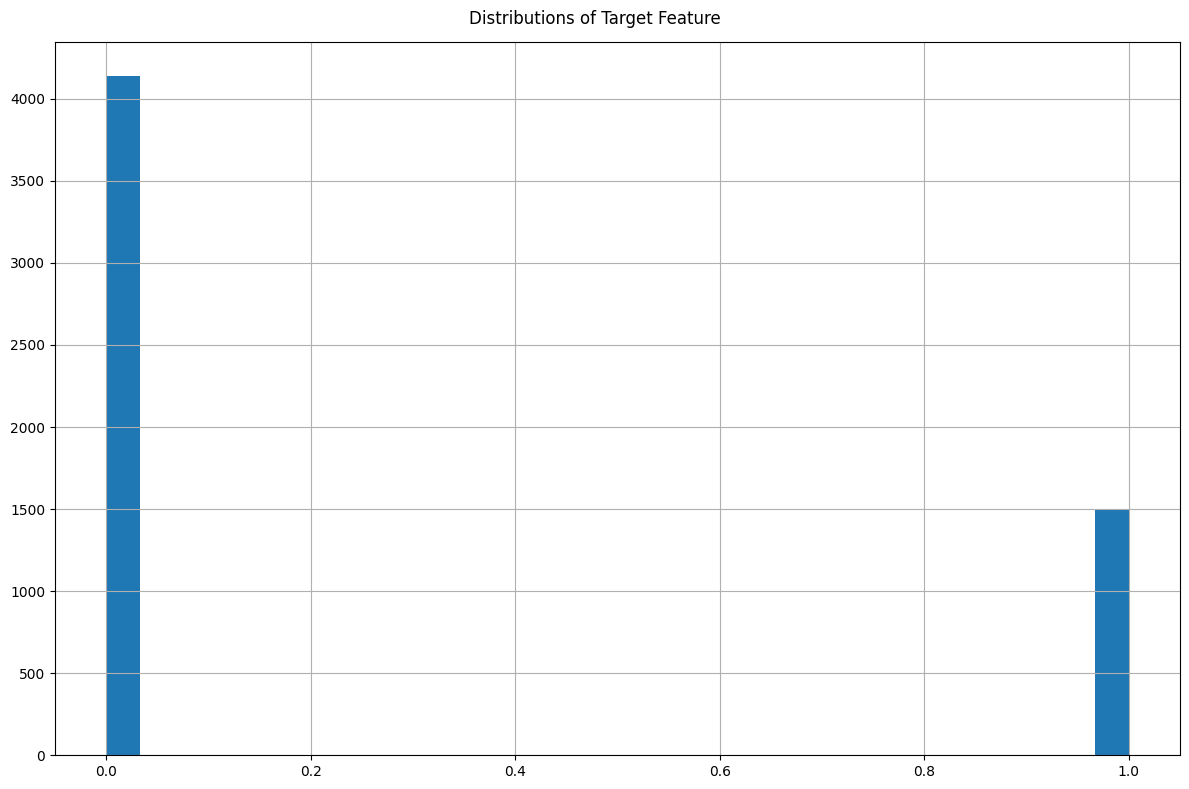

In [119]:
plt.figure(figsize=(12, 8))
y_train.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distributions of Target Feature")
plt.tight_layout()

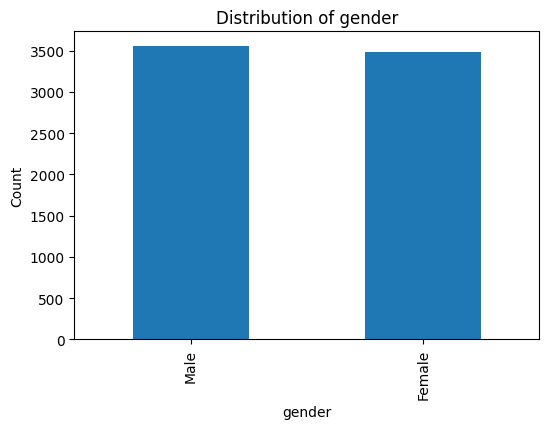

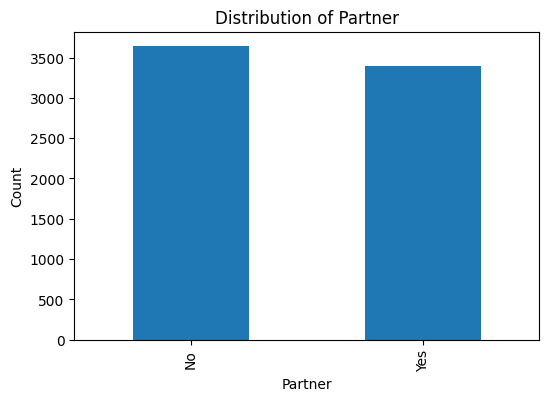

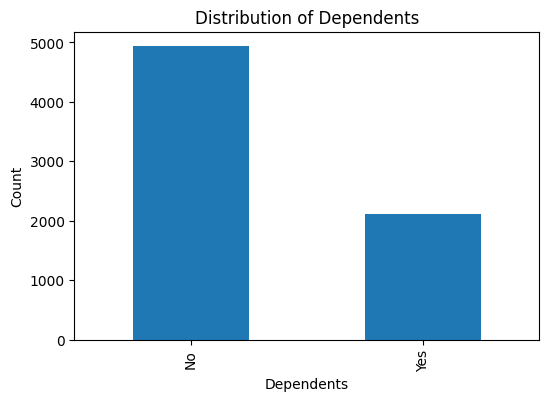

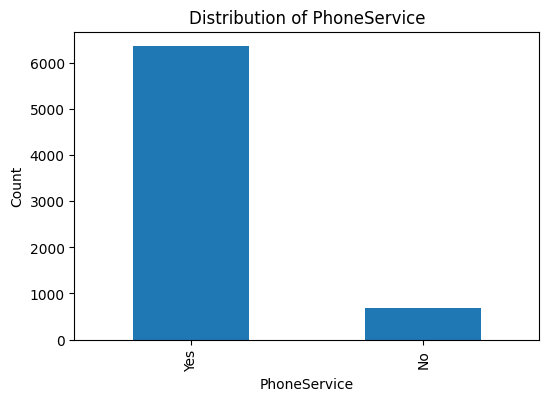

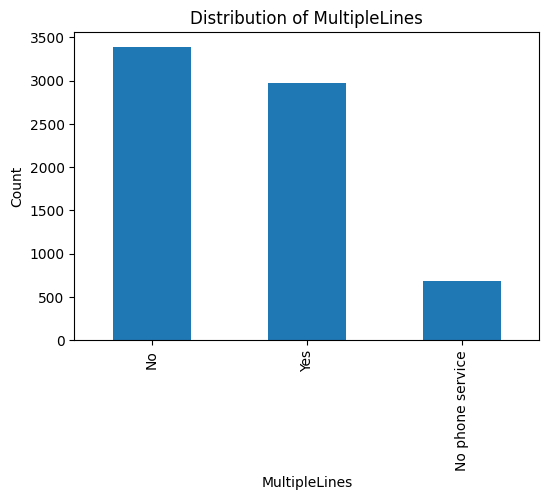

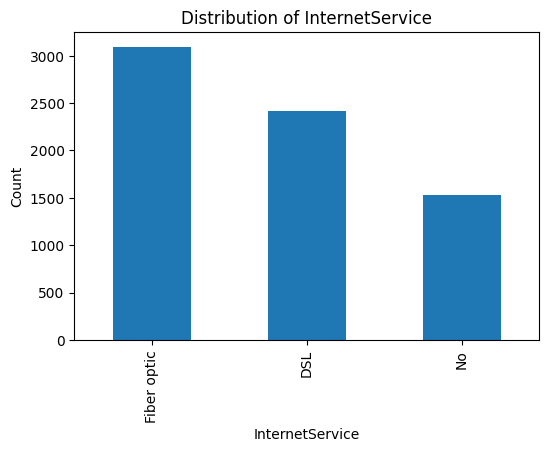

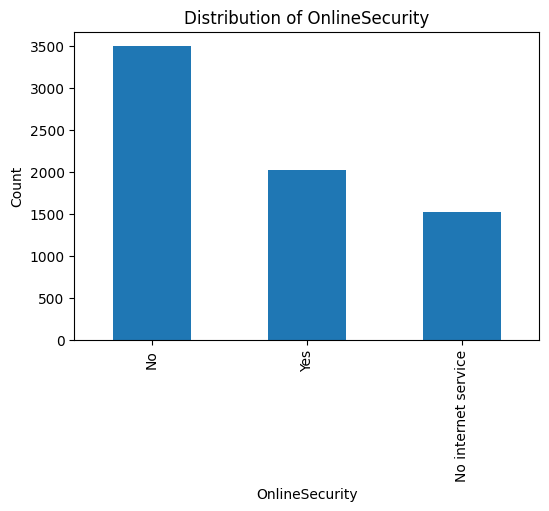

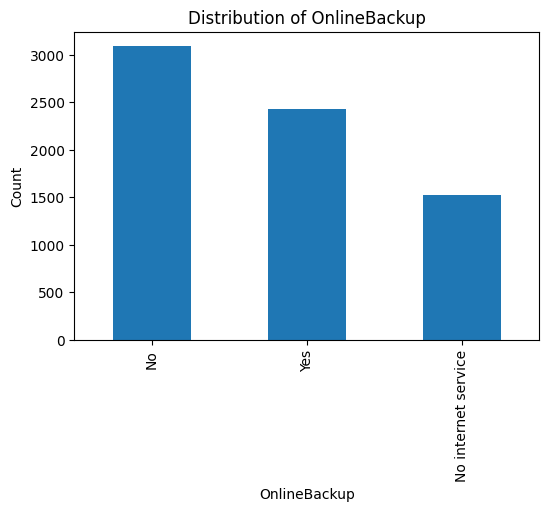

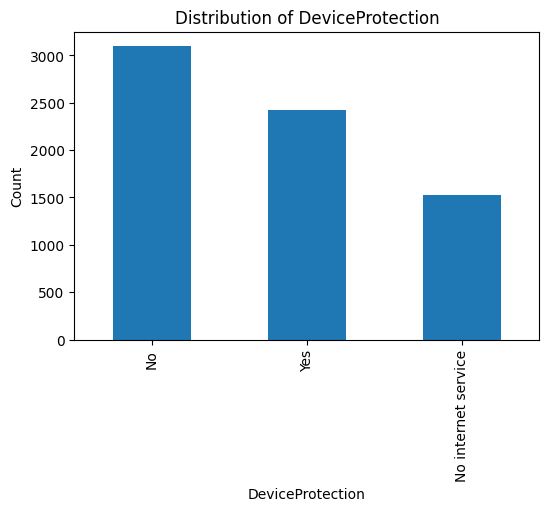

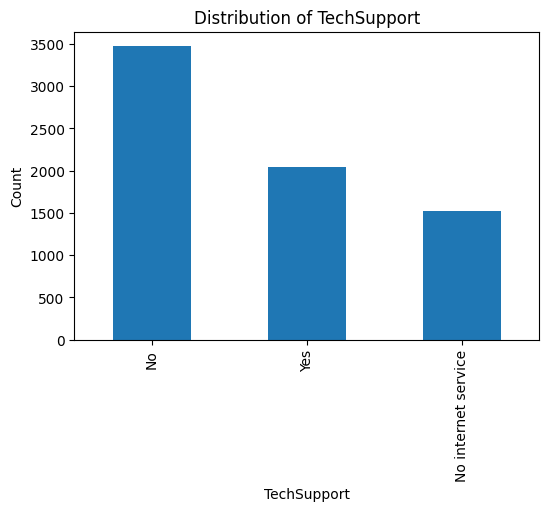

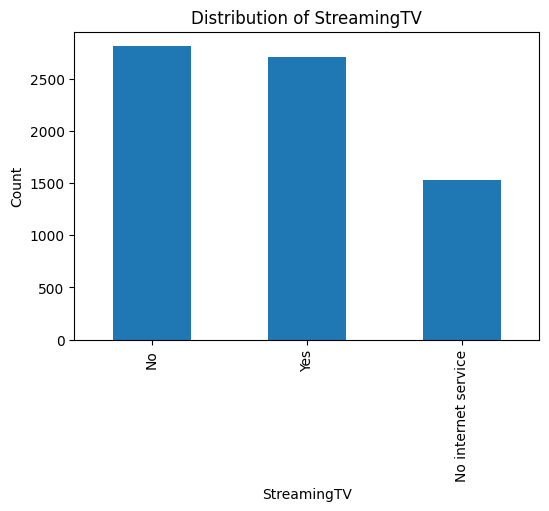

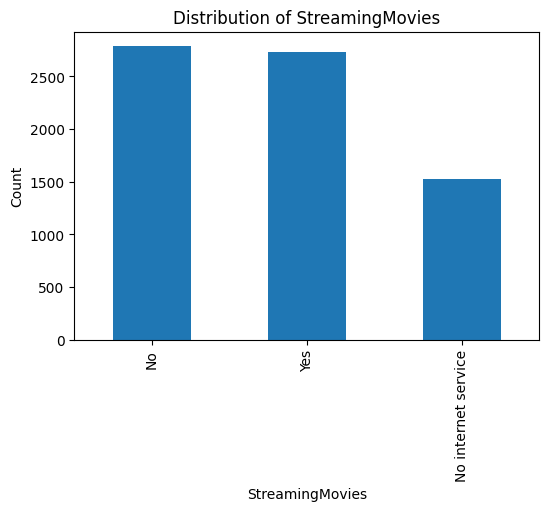

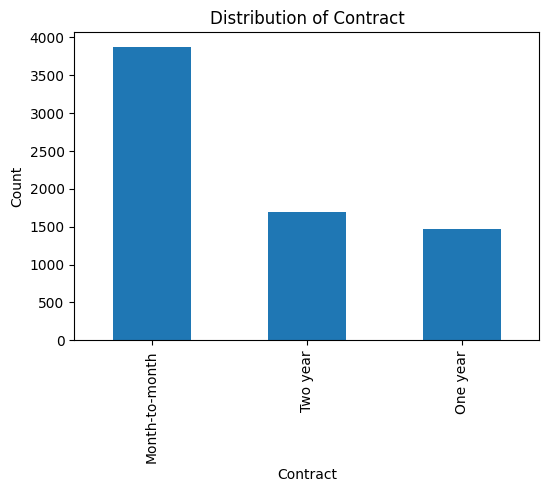

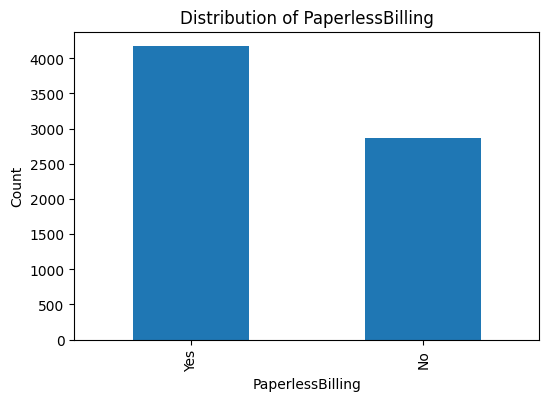

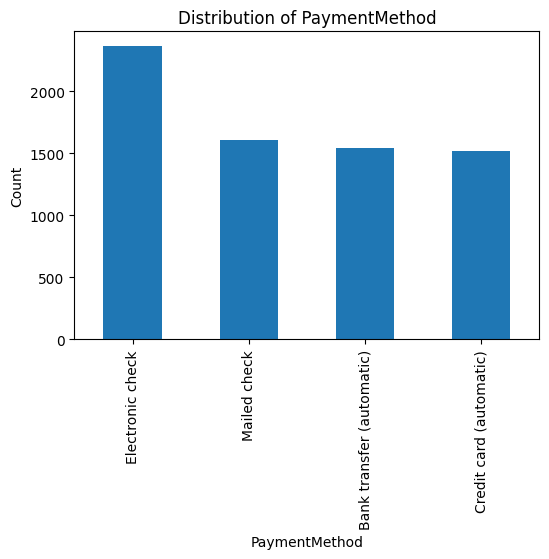

In [120]:
cat_cols_copy = X_train.copy()
cat_cols_copy = cat_cols_copy.drop(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'], axis=1)

for col in cat_cols_copy:
    plt.figure(figsize=(6,4))
    cust_df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [121]:
cat_cols_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5634 non-null   object
 1   Partner           5634 non-null   object
 2   Dependents        5634 non-null   object
 3   PhoneService      5634 non-null   object
 4   MultipleLines     5634 non-null   object
 5   InternetService   5634 non-null   object
 6   OnlineSecurity    5634 non-null   object
 7   OnlineBackup      5634 non-null   object
 8   DeviceProtection  5634 non-null   object
 9   TechSupport       5634 non-null   object
 10  StreamingTV       5634 non-null   object
 11  StreamingMovies   5634 non-null   object
 12  Contract          5634 non-null   object
 13  PaperlessBilling  5634 non-null   object
 14  PaymentMethod     5634 non-null   object
dtypes: object(15)
memory usage: 704.2+ KB
